In [1]:
import numpy as np
import random as rm
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, binom
from scipy import integrate

In [2]:
# build the target distribution
mu1, sigma1 = 0, 0.5
mu2, sigma2 = 17.5, 1
# N = 500

# x1 = np.random.normal(mu1, sigma1, N)
# x2 = np.random.normal(mu2, sigma2, N)

# f_pi = (0.4*x1 + 0.6*x2)

## Method 1

In [3]:
# calculate constant c
f_pi = lambda x: 0.4*(1/np.sqrt(2*math.pi*sigma1))*np.exp((-1/2)*((x-mu1)**2/sigma1)) + 0.6*(1/np.sqrt(2*math.pi*sigma2))*np.exp((-1/2)*((x-mu2)**2/sigma2))
pdf_eta = lambda x: np.power(0.4*(1/np.sqrt(2*math.pi*sigma1))*np.exp((-1/2)*((x-mu1)**2/sigma1)) + 0.6*(1/np.sqrt(2*math.pi*sigma2))*np.exp((-1/2)*((x-mu2)**2/sigma2)),0.75)
c = integrate.quad(pdf_eta, -inf, inf)
c = c[0]

In [4]:
def pdf_eta(x):
    output = (f_pi(x))**0.75/c
    return(output)


In [5]:
# define eta
def f_eta(x):
    return(pdf_eta(x)/c)

#pdf_eta = lambda x: np.power(0.4*(1/np.sqrt(2*math.pi*sigma1))*np.exp((-1/2)*((x-mu1)**2/sigma1)) + 0.6*(1/np.sqrt(2*math.pi*sigma2))*np.exp((-1/2)*((x-mu2)**2/sigma2)),0.75)


In [6]:
# define g
def g(x):
    return(f_pi(x)/f_eta(x))

In [7]:
# P
def p_kernel(y0,sigma,n):
    count = 0
    Yn = y0
    estimator = [y0]
    while count<n:
        y = np.random.normal(Yn,sigma)
        u = np.random.uniform(0,1)
        alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
        if u <= alpha:
            estimator.append(y)
            Yn = y
            count +=1
    return estimator

In [9]:
# K
def k_kernel(x0,sigma):
    count = 0
    Xn = x0
    estimator = [x0]
    while count<1:
        y = np.random.normal(Xn,sigma)
        u = np.random.uniform(0,1)
        alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
        if u <= alpha:
            estimator.append(y)
            Xn = y
            count +=1
    return estimator[-1]

In [11]:
# define S_y(g)
def S_y(y):
    sum = 0
    for i in y:
        sum += g(i)
    avg = sum/len(y)
    return avg

In [12]:
# def prob_list
def prob_list(y):
    prob_list = []
    sum = 0
    for i in y:
        sum += g(i)
    for i in y:
        prob_list.append(g(i)/sum)
    return prob_list

# Prob(y_i) = prob_list[i]

In [ ]:
# def prob_list_new


In [13]:
# define phi
''''
def phi_x(x,y):
    result = []
    for i in x:
        if i in y:
            count = y.count(i)
            index = y.index(i)
            result = result.append(prob_list(y)[index]*count)
    result = result/(S_y(y)*len(y))
    return result
'''

In [14]:
def phi_new(y):
    probs = prob_list(y)
    step = np.random.choice(y, p = probs)
    return(step)

In [15]:
prob_list([1,3,2,3])

[0.5737112474407885,
 0.07764337416842951,
 0.27100200422235254,
 0.07764337416842951]

In [16]:
# generate bernoulli list
def bernoulli_list(epsilon, n):
    b_list = bernoulli(epsilon).rvs(n)
    return b_list

# generate x
def x_sample(x0, epsilon, y, n, sigma):
    X_list = [x0]
    bernoullis = bernoulli_list(epsilon, n)
    for k in range(1,n):
        i = bernoullis[k]
        if i == 0:
            X_list.append(k_kernel(x0, sigma))
        if i == 1:
            X_list.append(np.random.choice(y[:k], p = prob_list(y[:k])))
        x0 = X_list[-1]
    return X_list

In [17]:
# define epsilon
epsilon1 = 0.05
epsilon2 = 0.25
epsilon3 = 0.5
epsilon4 = 0.75
epsilon5 = 0.95

In [18]:
# simulate Y
n = 30
y = p_kernel(5,10,n)


# simulate single x
x = k_kernel(5,1)

# simulate x
# x_sample(3, epsilon2, y, n, 2)

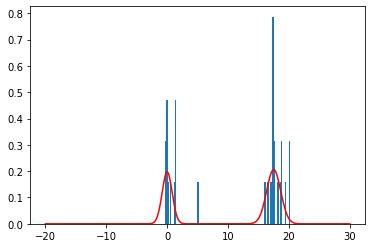

In [19]:
plt.hist(y, density = True, bins = 100)
t = np.linspace(-20,30,1000)
vals = pdf_eta(t)
plt.plot(t,vals, 'r')

In [20]:
# expectation
'''
def E_x(X_list):
    sum = 0
    for i in X_list:
        sum += i
    mean = sum/len(X_list)
    return mean
    '''

10.895545205242188


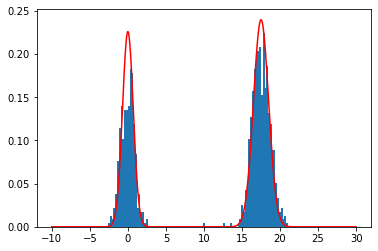

In [25]:
x0 = 10
y0 = 15
n = 1000
y = p_kernel(y0, 10, n)
x_list = x_sample(x0, epsilon2, y, n, 2)
# print(E_x(x_list))

plt.hist(x_list, bins = 100, density = True)
t = np.linspace(-10,30,1000)
vals = f_pi(t)
plt.plot(t,vals, 'r')

In [26]:
def x_sample_new(x0, epsilon, y, n, sigma):
    X_list = [x0]
    bernoullis = bernoulli_list(epsilon, n)
    for k in range(1, n):
        i = bernoullis[k]
        if i == 0:
            X_list.append(k_kernel(x0, sigma))
        if i == 1:
            X_list.append(np.random.choice(y[:k], p = prob_list(y[:k])))
        x0 = X_list[-1]
        
    x_bar = np.mean(X_list)*(1- 1/(n+1)) + 1/(n+1) * X_list[-1]
    return x_bar

In [33]:
x0 = 10
y0 = 15
n = 2000
y = p_kernel(y0, 10, n)
mean = x_sample_new(x0, epsilon1, y, n, 2)
print(mean)

12.175759839622229
